# Discussion 9

### Due Friday May 29, 11:59:59PM

# Scikit-Learn: Transformers, Estimators, and Pipelines
---

In [1]:
# import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Transformers and Estimators

Scikit learn includes two *base* modeling classes: Transfomers and Estimators. Both are classes that are meant to be *fit* on (training) data and then later used to transform (or predict with) unseen data.

### Transformers

* Transformers take input data and transform it into output data via the `transform` method.
* Sometimes transformers need prior information (parameters) about the data before transforming it.
    - In this case, the transformer is *fit* using the `fit` method on training data to estimate the parameters.
    - Once fit, the transformer may then be applied to `test` data (or unseen, new data).
* Fit parameters are accessed via an instance variable that ends in an *underscore*.

**Question 1** Using `Binarizer`, transform the `city-mpg` and `highway-mpg` column to 0 if the mpg is less than or equal to 25 and 1 if it's greater than 25.

In [51]:
cars = pd.read_csv('cars.csv')
cars.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [49]:
from sklearn.preprocessing import Binarizer

<AxesSubplot:>

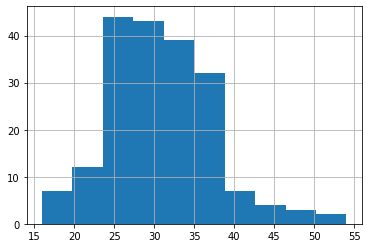

In [52]:
cars['highway-mpg'].hist()

In [53]:
binarizer = Binarizer(threshold=25)
highway_mpg_bin = binarizer.transform(cars[['highway-mpg']])
highway_mpg_bin

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

**Question 2** Using `FunctionTransformer`, transform the `city-mpg` and `highway-mpg` columns to a log-scale.

In [54]:
from sklearn.preprocessing import FunctionTransformer

In [55]:
func_tfr = FunctionTransformer(np.log)
func_tfr.transform(cars['city-mpg'])

0      3.044522
1      3.044522
2      2.944439
3      3.178054
4      2.890372
         ...   
188    3.135494
189    2.944439
190    2.890372
191    3.258097
192    2.944439
Name: city-mpg, Length: 193, dtype: float64

In [59]:
# Note the X is taken as numpy array
def my_log(X):
    return np.log(X) + 10

In [60]:
func_tfr = FunctionTransformer(my_log)
func_tfr.transform(cars['city-mpg'])

0      13.044522
1      13.044522
2      12.944439
3      13.178054
4      12.890372
         ...    
188    13.135494
189    12.944439
190    12.890372
191    13.258097
192    12.944439
Name: city-mpg, Length: 193, dtype: float64

Most transformers you will use will require being *fit to training data* before using it. An example of this is one-hot-encoding: before applying one-hot encoding to a column, you must determine the number of distinct values in the column (as that number determines the number of columns in the output).

**Question 3** *(Fit transformers properly handle unseen values)*

1. One-hot encode the `body-style` column using `OneHotEncoder`. What is the dimension of the output? Which column corresponds to which value of `body-style`? (If you can't remember the attribute name, look up the documentation!)
1. Fit a `OneHotEncoder` on the *first 5 rows* of the `body-style` column. Use this 'training data' to one-hot-encode the `body-style` in rest of the dataset. Why does it throw an exception? Look at the documentation -- what is the relevant parameter to avoid this? What are the implications of setting this parameter? What is the dimension of the output?

In [61]:
from sklearn.preprocessing import OneHotEncoder

In [62]:
cars['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [64]:
enc = OneHotEncoder()
enc.fit(cars[['body-style']].iloc[:5,])

OneHotEncoder()

In [66]:
enc.categories_

[array(['convertible', 'hatchback', 'sedan'], dtype=object)]

In [65]:
enc.transform(cars[['body-style']])

ValueError: Found unknown categories ['hardtop', 'wagon'] in column 0 during transform

In [67]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(cars[['body-style']].iloc[:5,])

OneHotEncoder(handle_unknown='ignore')

In [68]:
enc.transform(cars[['body-style']])

<193x3 sparse matrix of type '<class 'numpy.float64'>'
	with 161 stored elements in Compressed Sparse Row format>

In [69]:
enc.transform(cars[['body-style']]).toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1

In [70]:
enc.categories_

[array(['convertible', 'hatchback', 'sedan'], dtype=object)]

In [71]:
transformed_features = enc.transform(cars[['body-style']]).toarray()
enc.inverse_transform(transformed_features)

array([['convertible'],
       ['convertible'],
       ['hatchback'],
       ['sedan'],
       ['sedan'],
       ['sedan'],
       ['sedan'],
       [None],
       ['sedan'],
       ['sedan'],
       ['sedan'],
       ['sedan'],
       ['sedan'],
       ['sedan'],
       ['sedan'],
       ['sedan'],
       ['sedan'],
       ['hatchback'],
       ['hatchback'],
       ['sedan'],
       ['hatchback'],
       ['hatchback'],
       ['hatchback'],
       ['hatchback'],
       ['sedan'],
       ['sedan'],
       [None],
       ['hatchback'],
       ['hatchback'],
       ['hatchback'],
       ['hatchback'],
       ['hatchback'],
       ['hatchback'],
       ['sedan'],
       [None],
       ['hatchback'],
       ['hatchback'],
       ['sedan'],
       ['sedan'],
       ['sedan'],
       ['sedan'],
       ['sedan'],
       ['hatchback'],
       ['sedan'],
       ['sedan'],
       ['sedan'],
       ['hatchback'],
       ['hatchback'],
       ['hatchback'],
       ['sedan'],
       ['sedan'],
   

As you observed, the categories of `OneHotEncoder` are learned from training data and saved as an attribute of the transformer. These categories are then used to transform new, unseen data which is then used by other pieces of the ML pipeline.

Below is an illustration of why *fitting* a transformer is so important:

*The dangers of `pd.get_dummies`*: Pandas offers it's own one-hot encoder called `get_dummies`. This function is stateless; every time it's called, it determines the categories of the input data and one-hot encodes that data using those categories. However, as you saw in the above question, this is not a realistic use of the function!

To illustrate this:
1. We will create a one-hot encoding using scikit-learn that we will pass into a linear regression model.
1. We will create a *stateless* one-hot encoder that we will pass into a linear regression model.

Both of these models will be trained on the first 5 rows of the dataset; the rest will be used as 'unseen' data.

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
X_train, y_train = cars[['body-style']].head(5), cars['price'].head(5)
X_test, y_test = cars[['body-style']].tail(-5), cars['price'].tail(-5)

In [75]:
# Using sklearn transformers. What are the categories of the OneHotEncoder?
ohe = OneHotEncoder(handle_unknown='ignore')
lr = LinearRegression()

ohe.fit(X_train)
features = ohe.transform(X_train)
lr.fit(features, y_train)

LinearRegression()

In [76]:
# predict on the new data using the fit model:
lr.predict(ohe.transform(X_test))[:10]

array([15700. , 15700. , 15732.5, 15700. , 15700. , 15700. , 15700. ,
       15700. , 15700. , 15700. ])

In [77]:
# using a stateless one-hot encoder.
ohe = FunctionTransformer(pd.get_dummies, validate=False)
lr = LinearRegression()

ohe.fit(X_train)
features = ohe.transform(X_train)
lr.fit(features, y_train)

LinearRegression()

In [78]:
features

,body-style_convertible,body-style_hatchback,body-style_sedan
0,1,0,0
1,1,0,0
2,0,1,0
3,0,0,1
4,0,0,1


In [79]:
# debug this!
lr.predict(ohe.transform(X_test))[:10]

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 5)

In [62]:
ohe.transform(X_test)

,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
5,0,0,0,1,0
6,0,0,0,1,0
7,0,0,0,0,1
8,0,0,0,1,0
9,0,0,0,1,0
...,...,...,...,...,...
188,0,0,0,1,0
189,0,0,0,1,0
190,0,0,0,1,0
191,0,0,0,1,0


**Note:** Even worse, there are cases where such an ML pipeline doesn't even throw an exception -- the incorrect columns get silently passed on. 

**The below predictions are wrong! Can you tell that it's wrong?** Debugging statistical output is notoriously hard -- this is why statistical analysis of the output data is always an important step to check your work!

In [80]:
X_train, y_train = cars[['body-style']].head(5), cars['price'].head(5)
X_test, y_test = cars[['body-style']].iloc[5:20], cars['price'].iloc[5:20]

In [81]:
ohe = FunctionTransformer(pd.get_dummies, validate=False)
lr = LinearRegression()

ohe.fit(X_train)
features = ohe.transform(X_train)
lr.fit(features, y_train)

LinearRegression()

In [82]:
# THIS IS WRONG! debug this! 
lr.predict(ohe.transform(X_test))[:10]

array([16500., 16500., 15700., 16500., 16500., 16500., 16500., 16500.,
       16500., 16500.])

In [84]:
ohe.transform(X_train)

,body-style_convertible,body-style_hatchback,body-style_sedan
0,1,0,0
1,1,0,0
2,0,1,0
3,0,0,1
4,0,0,1


In [69]:
ohe.transform(X_test)

,body-style_hatchback,body-style_sedan,body-style_wagon
5,0,1,0
6,0,1,0
7,0,0,1
8,0,1,0
9,0,1,0
10,0,1,0
11,0,1,0
12,0,1,0
13,0,1,0
14,0,1,0


# Building custom Transformers

Building your own transformer class is easy! There is are convenient base-classes you can inherit: `TranformerMixin` and `BaseEstimator`. To subclass these classes, you need to:
1. implement the `fit` method, and
2. implement the `transform` method.
Once you have done that, you can use your custom transformer as part of a `Pipeline` that can leverage all the nice features of scikit-learn (like feature-selection libraries and cross-validation).

To get acquainted with the structure of a transformer, it's useful to look at `sklearn` source code. First, you will walk through the source code of the `Binarizer` transformer ([source code](https://github.com/scikit-learn/scikit-learn/blob/7813f7efb/sklearn/preprocessing/data.py#L1789)).

The source code is included below. Note, that there is a lot of boiler-plate code, but the *transform* method is the relevant method. (Why does the fit method do nothing?)

```
class Binarizer(BaseEstimator, TransformerMixin):
    """Binarize data (set feature values to 0 or 1) according to a threshold
    Values greater than the threshold map to 1, while values less than
    or equal to the threshold map to 0. With the default threshold of 0,
    only positive values map to 1.
    Binarization is a common operation on text count data where the
    analyst can decide to only consider the presence or absence of a
    feature rather than a quantified number of occurrences for instance.
    It can also be used as a pre-processing step for estimators that
    consider boolean random variables (e.g. modelled using the Bernoulli
    distribution in a Bayesian setting).
    Read more in the :ref:`User Guide <preprocessing_binarization>`.
    Parameters
    ----------
    threshold : float, optional (0.0 by default)
        Feature values below or equal to this are replaced by 0, above it by 1.
        Threshold may not be less than 0 for operations on sparse matrices.
    copy : boolean, optional, default True
        set to False to perform inplace binarization and avoid a copy (if
        the input is already a numpy array or a scipy.sparse CSR matrix).
    Examples
    --------
    >>> from sklearn.preprocessing import Binarizer
    >>> X = [[ 1., -1.,  2.],
    ...      [ 2.,  0.,  0.],
    ...      [ 0.,  1., -1.]]
    >>> transformer = Binarizer().fit(X)  # fit does nothing.
    >>> transformer
    Binarizer(copy=True, threshold=0.0)
    >>> transformer.transform(X)
    array([[1., 0., 1.],
           [1., 0., 0.],
           [0., 1., 0.]])
    Notes
    -----
    If the input is a sparse matrix, only the non-zero values are subject
    to update by the Binarizer class.
    This estimator is stateless (besides constructor parameters), the
    fit method does nothing but is useful when used in a pipeline.
    See also
    --------
    binarize: Equivalent function without the estimator API.
    """

    def __init__(self, threshold=0.0, copy=True):
        self.threshold = threshold
        self.copy = copy

    def fit(self, X, y=None):
        """Do nothing and return the estimator unchanged
        This method is just there to implement the usual API and hence
        work in pipelines.
        Parameters
        ----------
        X : array-like
        """
        check_array(X, accept_sparse='csr')
        return self

    def transform(self, X, copy=None):
        """Binarize each element of X
        Parameters
        ----------
        X : {array-like, sparse matrix}, shape [n_samples, n_features]
            The data to binarize, element by element.
            scipy.sparse matrices should be in CSR format to avoid an
            un-necessary copy.
        copy : bool
            Copy the input X or not.
        """
        copy = copy if copy is not None else self.copy
        return binarize(X, threshold=self.threshold, copy=copy)

    def _more_tags(self):
        return {'stateless': True}
```

The relevant (portion of the) function `binarize` from the transform method is here:

```
def binarize(X, threshold=0.0, copy=True):
    ...
    cond = X > threshold
    not_cond = np.logical_not(cond)
    X[cond] = 1
    X[not_cond] = 0
    return X
```

**Question 4** 

As a warm-up, create a transformer that drops the `i`th row of an input dataset.

In [85]:
from sklearn.base import BaseEstimator, TransformerMixin

class ColumnDropper(BaseEstimator, TransformerMixin):

    def __init__(self, index):
        self.index = index

    def fit(self, X, y=None):
        """
        Does nothing! Stateless!
        """
        return self

    def transform(self, X, y=None):
        """
        Drops the ith column of X, where i=index
        """
        # np.delete(X, self.index, 0)
        return np.delete(np.array(X), self.index, 0)

In [137]:
np.delete(np.array(cars.iloc[:,:5]), 3, 1)

array([['alfa-romero', 'gas', 'std', 'convertible'],
       ['alfa-romero', 'gas', 'std', 'convertible'],
       ['alfa-romero', 'gas', 'std', 'hatchback'],
       ['audi', 'gas', 'std', 'sedan'],
       ['audi', 'gas', 'std', 'sedan'],
       ['audi', 'gas', 'std', 'sedan'],
       ['audi', 'gas', 'std', 'sedan'],
       ['audi', 'gas', 'std', 'wagon'],
       ['audi', 'gas', 'turbo', 'sedan'],
       ['bmw', 'gas', 'std', 'sedan'],
       ['bmw', 'gas', 'std', 'sedan'],
       ['bmw', 'gas', 'std', 'sedan'],
       ['bmw', 'gas', 'std', 'sedan'],
       ['bmw', 'gas', 'std', 'sedan'],
       ['bmw', 'gas', 'std', 'sedan'],
       ['bmw', 'gas', 'std', 'sedan'],
       ['bmw', 'gas', 'std', 'sedan'],
       ['chevrolet', 'gas', 'std', 'hatchback'],
       ['chevrolet', 'gas', 'std', 'hatchback'],
       ['chevrolet', 'gas', 'std', 'sedan'],
       ['dodge', 'gas', 'std', 'hatchback'],
       ['dodge', 'gas', 'std', 'hatchback'],
       ['dodge', 'gas', 'turbo', 'hatchback'],
       ['

In [87]:
cd = ColumnDropper(index=4)
cd.transform(cars.iloc[:,:5])

array([['alfa-romero', 'gas', 'std', 'two', 'convertible'],
       ['alfa-romero', 'gas', 'std', 'two', 'convertible'],
       ['alfa-romero', 'gas', 'std', 'two', 'hatchback'],
       ['audi', 'gas', 'std', 'four', 'sedan'],
       ['audi', 'gas', 'std', 'two', 'sedan'],
       ['audi', 'gas', 'std', 'four', 'sedan'],
       ['audi', 'gas', 'std', 'four', 'wagon'],
       ['audi', 'gas', 'turbo', 'four', 'sedan'],
       ['bmw', 'gas', 'std', 'two', 'sedan'],
       ['bmw', 'gas', 'std', 'four', 'sedan'],
       ['bmw', 'gas', 'std', 'two', 'sedan'],
       ['bmw', 'gas', 'std', 'four', 'sedan'],
       ['bmw', 'gas', 'std', 'four', 'sedan'],
       ['bmw', 'gas', 'std', 'four', 'sedan'],
       ['bmw', 'gas', 'std', 'two', 'sedan'],
       ['bmw', 'gas', 'std', 'four', 'sedan'],
       ['chevrolet', 'gas', 'std', 'two', 'hatchback'],
       ['chevrolet', 'gas', 'std', 'two', 'hatchback'],
       ['chevrolet', 'gas', 'std', 'four', 'sedan'],
       ['dodge', 'gas', 'std', 'two', 'hatc

**Question 5**

Columns that don't have much variation are not very useful for prediction. An extreme case is when a column has only a single value.  Create a "feature selection" transformer that drops any columns that don't have a standard-deviation greater than an input threshold.

* What needs to be calculated during the fitting process? When is the standard deviation calculated?

In [92]:
from sklearn.base import BaseEstimator, TransformerMixin

class LowStdColumnDropper(BaseEstimator, TransformerMixin):

    def __init__(self, thresh=0):
        '''
        Drops columns whose standard deviation is less than thresh.
        '''
        self.thresh = thresh

    def fit(self, X, y=None):
        """
        ...
        """

        self.columns_ = (X.std(axis=0) >= self.thresh).values
        
        return self

    def transform(self, X, y=None):
        """
        ...
        """
        if isinstance(X, np.ndarray):
            out = X[:,self.columns_]
        else:
            out = X.iloc[:,self.columns_]
        
        return out

In [93]:
cars_numeric_df = cars.select_dtypes('number')
cars_numeric_df.head()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [91]:
(cars_numeric_df.std(axis=0) >= 10).values

array([False,  True, False, False,  True,  True, False, False, False,
        True,  True, False, False,  True])

In [95]:
lvd = LowStdColumnDropper(thresh=10.0)
lvd.fit(cars.select_dtypes('number'))
lvd.transform(cars.select_dtypes('number'))

,length,curb-weight,engine-size,horsepower,peak-rpm,price
0,168.8,2548,130,111,5000,13495.0
1,168.8,2548,130,111,5000,16500.0
2,171.2,2823,152,154,5000,16500.0
3,176.6,2337,109,102,5500,13950.0
4,176.6,2824,136,115,5500,17450.0
...,...,...,...,...,...,...
188,188.7,2952,141,114,5400,16845.0
189,188.7,3049,141,160,5300,19045.0
190,188.7,3012,173,134,5500,21485.0
191,188.7,3217,145,106,4800,22470.0


# Scikit-Learn Pipelines

Pipelines are ways of chaining transformers and estimators together. 
* A **Pipeline** object is a sequence of transformers that perhaps end with estimator.
* When you call `.fit(X, y)` on a pipeline, the pipeline calls `fit_transform` on each successive transformer in the pipeline, passing the transformed data to the next transformer in the sequence.
* A pipeline that consists of a sequence of transformers is itself a transformer.
* A pipeline that consists of a sequence of transformers, followed by an estimator, is itself an estimator.
    - These observations allow you put pipelines inside of other pipelines!

**Question 6** Create a *single* pipeline that consists of a `OneHotEncoder`, followed by a `LowStdColumnDropper`, followed by a `LinearRegression` model. That is, one-hot encode the categorical features, drop the low-variance columns, and use those features to fit a linear regression model. Your threshold for "small standard deviation" should be `0.1`. 

*Remark:* Be sure to pass `sparse=False` into `OneHotEncoder` (or else, make your `LowStdColumnDropper` handle sparse matrices).

How many columns did your pipeline drop? (Use the `named_steps` attribute!)



In [96]:
from sklearn.pipeline import Pipeline

In [112]:
cars.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [104]:
pipe = Pipeline([
    ('ohe', OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')),
#     ('l_sdt_drop', LowStdColumnDropper()),
    ('lr', LinearRegression()),
])

In [105]:
feature_columns = ['make', 'aspiration', 'num-of-doors']
pred_column = ['price']

In [106]:
pipe.fit(cars[feature_columns], cars[pred_column])

Pipeline(steps=[('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False)),
                ('lr', LinearRegression())])

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cars[feature_columns], cars[pred_column], random_state=0)

In [108]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False)),
                ('lr', LinearRegression())])

In [ ]:
pipe.score(X_test, y_test)

In [136]:
pipe.score(X_test, y_test)

0.8509056385867547

### Putting columns together using `ColumnTransformer`

You can run many different transformers in parallel on different subsets of columns using `ColumnTransformer` (see the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html#sklearn.compose.ColumnTransformer)).

One common pattern for using `ColumnTransformer` is to create a transformer pipeline for each kind of data in your dataset and use `ColumnTransformer` to put the transformed features together into a single dataset.

**Question 7**

Create a general pipeline that transforms different data-kinds with appropriate generic features (e.g. one-hot-encoder, ordinal-encoder) by filling in the `...` below:

In [111]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [112]:
quantitative_cols = ['engine-size', 'horsepower', 'peak-rpm']
ordinal_cols = ['num-of-doors']
nominal_cols = ['make', 'body-style']

In [124]:
quantitative_pipeline = Pipeline([
    ('qp', StandardScaler())
])
ordinal_pipeline = Pipeline([
    ('op', OrdinalEncoder())
])
nominal_pipeline = Pipeline([
    ('np', OneHotEncoder(handle_unknown='ignore'))
])

In [125]:
feature_eng_pipeline = ColumnTransformer([
    ('quant', quantitative_pipeline, quantitative_cols),
    ('ordin', ordinal_pipeline, ordinal_cols),
    ('nomin', nominal_pipeline, nominal_cols)
])

In [126]:
pl = Pipeline(steps=[('feature_eng',feature_eng_pipeline), ('regressor',LinearRegression())])

**Question 8** 

Fit the pipeline and predict with it. Check the outputs at each step using `named_steps`.

In [130]:
X_train, X_test, y_train, y_test = train_test_split(cars[quantitative_cols + ordinal_cols + nominal_cols], 
                                                    cars['price'], 
                                                    test_size=0.3, 
                                                    random_state=42)

In [131]:
pl.fit(X_train, y_train)

Pipeline(steps=[('feature_eng',
                 ColumnTransformer(transformers=[('quant',
                                                  Pipeline(steps=[('qp',
                                                                   StandardScaler())]),
                                                  ['engine-size', 'horsepower',
                                                   'peak-rpm']),
                                                 ('ordin',
                                                  Pipeline(steps=[('op',
                                                                   OrdinalEncoder())]),
                                                  ['num-of-doors']),
                                                 ('nomin',
                                                  Pipeline(steps=[('np',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['make', 'body-style']

In [132]:
pl.predict(X_test)

array([42142.55021275,  9809.56986183,  9222.40930959,  7888.03209529,
        6805.1408287 ,  7068.41029801, 27788.62272008,  7881.39066547,
       28300.89376323, 16887.72135089,  9752.57150368,  6338.67171709,
       18522.71017899, 40554.41510685,  8086.42502388,  5855.3178994 ,
        8012.17350178,  5100.12695993,  6031.32096296,  5100.12695993,
       14560.46721597,  8508.86402048, 32595.02736813, 14792.44645912,
        5100.12695993, 14225.95132826,  6422.01069165, 12534.52274444,
       30080.11301231,  6770.93618523,  9454.58334523, 16286.5864021 ,
        8701.01246276,  9632.9704748 ,  9933.34091579, 17989.45991976,
       14560.46721597,  6770.93618523, 16286.5864021 ,  6463.37893013,
        5519.04991981, 10728.20086803,  8934.26477914,  8128.01256777,
        6970.18144611, 17216.22042117, 16908.28862195, 10483.78074522,
       13690.41109048,  6137.81905889,  7147.37925593,  8186.7480888 ,
       13770.65475517,  9971.50970207, 11035.55162217,  9753.88657642,
      

In [133]:
pl.score(X_test, y_test)

0.8904730257021002

# Finished? Turn in Question 5 for Grading